In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

 all_language_files.zip				'M.Tech DA'		 'Resume1 (3).pdf'
 aps_failure_training_set.csv			'October mess fees.pdf'   Resume1.pdf
 Bachelor_Degree_Certificate_and_Marksheet.pdf	 Report.gdoc		  test_dataset.zip
'Colab Notebooks'				 Resume			  validation_dataset.zip
'Fixed Resume.pdf'				'Resume1 (1).pdf'
 language_files_massive.zip			'Resume1 (2).pdf'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv("/content/drive/My Drive/aps_failure_training_set.csv")
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


# Exploratory Data Analysis

In [ ]:
data.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


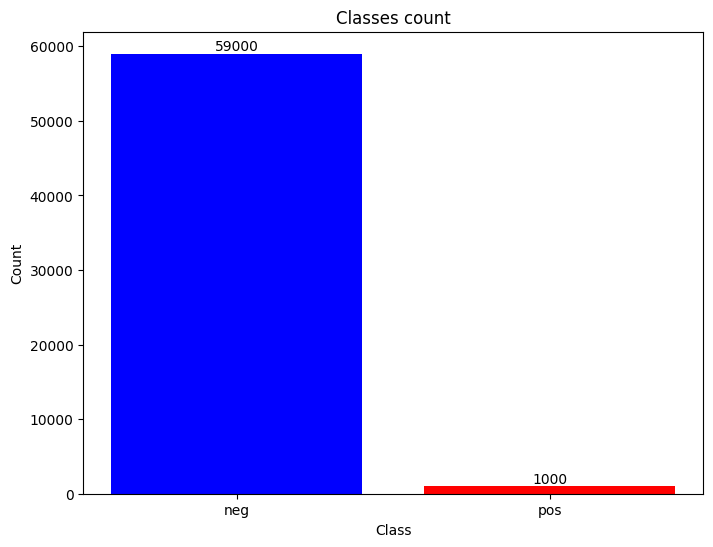

In [ ]:
counts = data['class'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(counts.index, counts.values, color=['blue', 'red'])

for bar, count in zip(bars, counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, count,
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Classes count')
plt.show()

Based on this , we can observe that there are many more data points classified as 'neg', which corresponds to air systems without defects, than data points classified as 'pos', which are anamolous air systems.

In [ ]:
missing_counts=data.apply(lambda x:x[x=='na'].count())

total_counts=len(data)

misssing_percentage=(missing_counts/total_counts)*100

missing_data=pd.DataFrame({'Columns':missing_counts.index,
                           'Missing Values':missing_counts.values,
                           'Percentage of Missing Values':misssing_percentage.values
                           })

missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data = missing_data.sort_values(by='Percentage of Missing Values', ascending=False)

print(missing_data)

    Columns  Missing Values  Percentage of Missing Values
79   br_000           49264                     82.106667
78   bq_000           48722                     81.203333
77   bp_000           47740                     79.566667
76   bo_000           46333                     77.221667
113  cr_000           46329                     77.215000
..      ...             ...                           ...
85   by_000             473                      0.788333
97   ck_000             338                      0.563333
96   cj_000             338                      0.563333
95   ci_000             338                      0.563333
81   bt_000             167                      0.278333

[169 rows x 3 columns]


In [ ]:
# Get columns with more than 5% missing values
coloumns_with_missing_values=missing_data[missing_data['Percentage of Missing Values']>5]['Columns'].tolist()
print(len(coloumns_with_missing_values))
print(coloumns_with_missing_values)

42
['br_000', 'bq_000', 'bp_000', 'bo_000', 'cr_000', 'ab_000', 'bn_000', 'bm_000', 'bl_000', 'bk_000', 'co_000', 'cg_000', 'ad_000', 'cf_000', 'ch_000', 'ct_000', 'cy_000', 'cz_000', 'cu_000', 'cv_000', 'dc_000', 'da_000', 'cx_000', 'db_000', 'ec_00', 'cm_000', 'ed_000', 'cl_000', 'ak_000', 'ca_000', 'dm_000', 'dg_000', 'df_000', 'dl_000', 'dh_000', 'dj_000', 'eb_000', 'dk_000', 'di_000', 'ac_000', 'bx_000', 'cc_000']


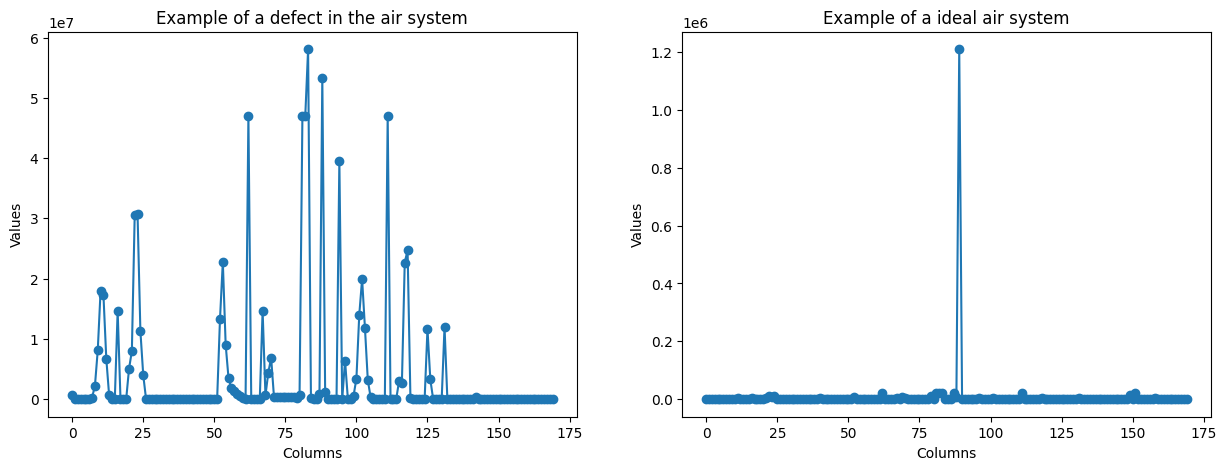

In [ ]:
def plot_examples(index):
    data_copy=data.copy()
    data_copy.replace('na',0,inplace=True)

    positive=data_copy[data_copy['class']=='pos'].iloc[index].drop('class',axis=0)
    negative=data_copy[data_copy['class']=='neg'].iloc[index].drop('class',axis=0)

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(positive.values,marker='o',linestyle='-')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.title('Example of a defect in the air system')

    plt.subplot(1,2,2)
    plt.plot(negative.values,marker='o',linestyle='-')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.title('Example of a ideal air system')

    plt.show()

plot_examples(3)

We can see from the plot that an ideal air system and an anomalous air system to start understanding the dataset we are working with. One idea that arises from this is to analyze the quartiles of an anomalous data point and an ideal data point to try to indetify any interesting differences that could be useful for training a future machine learning model

In [ ]:
data.dtypes

,0
class,object
aa_000,int64
ab_000,object
ac_000,object
ad_000,object
...,...
ee_007,object
ee_008,object
ee_009,object
ef_000,object


From above we can see that dtypes is object. We have to convert it into numerical.

In [ ]:
columns=data.columns[1:]
data[columns]=data[columns].apply(pd.to_numeric,errors='coerce')
data.dtypes

,0
class,object
aa_000,int64
ab_000,float64
ac_000,float64
ad_000,float64
...,...
ee_007,float64
ee_008,float64
ee_009,float64
ef_000,float64


In [ ]:
def describe(df):
  df_pos=df[df['class']=='pos'].drop('class',axis=1)
  df_neg=df[df['class']=='neg'].drop('class',axis=1)

  print('POS')
  print(df_pos.describe())
  print('Neg')
  print(df_neg.describe())

describe(data)

POS
             aa_000      ab_000        ac_000        ad_000       ae_000  \
count  1.000000e+03  229.000000  5.380000e+02    355.000000   659.000000   
mean   6.591737e+05    1.563319  5.940968e+07   2262.214085    20.130501   
std    4.343839e+05    4.466411  3.511083e+08   5463.415364   234.564023   
min    0.000000e+00    0.000000  0.000000e+00      0.000000     0.000000   
25%    3.181575e+05    0.000000  4.500000e+00    191.000000     0.000000   
50%    5.849940e+05    0.000000  8.650000e+02    648.000000     0.000000   
75%    9.305015e+05    2.000000  2.729500e+03   2014.000000     0.000000   
max    2.746564e+06   48.000000  2.130706e+09  60466.000000  5386.000000   

             af_000         ag_000        ag_001        ag_002        ag_003  \
count    659.000000     996.000000  9.960000e+02  9.960000e+02  9.960000e+02   
mean      54.907436    2159.925703  5.108507e+04  4.004426e+05  2.617797e+06   
std      621.432189   22245.119346  2.560935e+05  9.998827e+05  4.24764

#Data Preprocessing

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df = df.replace('na', np.nan)
    df = df.drop(columns=coloumns_with_missing_values, errors='ignore')
    df['class'] = pd.Categorical(df['class'])
    label_map = {'neg': 0, 'pos': 1}
    df['class'] = df['class'].map(label_map)
    numeric_cols = df.select_dtypes(include=np.number).columns
    df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))
    scaler = MinMaxScaler()
    df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

    return df


data = preprocess(data)
data.head()

<ipython-input-13-ae3c08ae6b5c>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.79250729e-02 1.20361295e-02 1.49423061e-02 ... 4.07782233e-05
 2.92336170e-02 1.46444794e-02]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])


,class,aa_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,0.027925,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000163,0.007996,...,0.015918,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000
1,0,0.012036,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000080,0.003646,...,0.005407,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.000000
2,0,0.014942,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000007,0.002068,...,0.003559,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.000000
3,0,0.000004,0.0,0.000498,0.0,0.0,0.0,0.000005,0.000010,0.000018,...,0.000003,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.027923
4,0,0.022164,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000191,0.010975,...,0.007981,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.000000


Let’s learn to deal with class-imbalance this time! We will consider the IDA2016 Challenge dataset for
our experimentation.    The dataset is a binary classification y = {‘pos’, ‘neg’} problem with 170
features and 60,000 data points.    The craziness here is that the class ratio is 1:59, that is, for every
positive data point, there are 59 negative data points in the training data.    The challenge dataset has
a training file (aps_failure_training_set.csv) and a testing file (aps_failure_test_set.csv).    We will
consider only the training file for our experimentation.

# Task 1
* Split the data file (aps_failure_training_set.csv) into train and test partitions.
* Build baseline classifiers {SVC, LogReg and DecisionTree} by cross-validating the best hyper-parameters of the respective models. For SVC, the hyperparametes are {kernel, kernel-params}; for LogReg
{regularization choice L1/L2, regularization params}; and for DT {depth, leaf size}.
Upon using GridSearchCV, the best parameters are to be found.
* Note that, GridSearchCV does 5-fold CV by default, which is sufficient for us.  Once the parameters are fixed, you will learn the models on the train partition and report the performance metrics on the train and test partitions.

In [ ]:
X=data.drop(['class'], axis=1)
y=data['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=355)

In [ ]:
X_train

,aa_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
32318,0.000009,0.0,0.0,0.0,0.0,0.000000,0.000000,1.109118e-05,0.000024,0.000010,...,0.000006,2.913260e-06,4.734830e-07,3.482183e-07,6.327549e-07,5.017557e-08,0.000000,0.000000,0.0,0.0
879,0.001544,0.0,0.0,0.0,0.0,0.000000,0.000000,2.222605e-05,0.001052,0.000806,...,0.000124,7.558585e-05,6.342614e-05,1.248711e-04,4.328044e-04,1.103210e-03,0.000032,0.000000,0.0,0.0
35059,0.000599,0.0,0.0,0.0,0.0,0.000000,0.000000,4.195244e-07,0.000546,0.000011,...,0.000096,8.310736e-05,2.586864e-04,6.970634e-04,1.626180e-05,1.338015e-07,0.000000,0.000000,0.0,0.0
57467,0.250830,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.0
4017,0.015015,0.0,0.0,0.0,0.0,0.000000,0.000000,3.111472e-06,0.003052,0.021172,...,0.005105,5.360875e-03,4.382888e-03,5.755631e-03,7.131717e-03,9.865353e-04,0.008312,0.004070,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26675,0.002739,0.0,0.0,0.0,0.0,0.000000,0.000000,1.654499e-05,0.001645,0.001805,...,0.000853,9.095197e-04,6.152809e-04,1.198010e-03,8.711137e-04,1.589395e-04,0.002603,0.001859,0.0,0.0
7459,0.022369,0.0,0.0,0.0,0.0,0.000000,0.000000,7.470156e-05,0.003119,0.029624,...,0.009375,9.423760e-03,6.945543e-03,9.594842e-03,1.115813e-02,1.112141e-03,0.002387,0.000000,0.0,0.0
24053,0.000005,0.0,0.0,0.0,0.0,0.000000,0.000000,3.070394e-05,0.000008,0.000018,...,0.000001,4.767152e-07,8.028625e-07,1.532161e-06,1.328785e-06,8.362595e-08,0.000000,0.000000,0.0,0.0
19074,0.113035,0.0,0.0,0.0,0.0,0.000858,0.013628,2.949749e-02,0.055644,0.037727,...,0.018196,1.542492e-02,1.079414e-02,1.749309e-02,1.331135e-01,3.951968e-02,0.001805,0.000000,0.0,0.0


In [ ]:
X_test

,aa_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
42237,0.000028,0.0,0.0,0.0,0.0,0.0,0.000000,2.176283e-06,0.000092,0.000258,...,0.000022,2.489513e-06,9.675522e-07,6.964366e-08,0.000000,0.000000,0.000000,0.000000,0.0,0.0
24143,0.000003,0.0,0.0,0.0,0.0,0.0,0.000000,4.370045e-08,0.000000,0.000026,...,0.000002,4.767152e-07,6.175865e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
20925,0.000519,0.0,0.0,0.0,0.0,0.0,0.000011,3.567705e-05,0.000299,0.000574,...,0.000040,5.344508e-05,4.553671e-05,9.133766e-05,0.000977,0.000122,0.000010,0.000000,0.0,0.0
12715,0.011272,0.0,0.0,0.0,0.0,0.0,0.000000,5.191614e-06,0.001902,0.012338,...,0.005518,5.407381e-03,4.269458e-03,4.083556e-03,0.002918,0.000325,0.001847,0.000135,0.0,0.0
14940,0.010547,0.0,0.0,0.0,0.0,0.0,0.000000,5.244055e-07,0.000398,0.014624,...,0.003745,3.900643e-03,2.974626e-03,6.471324e-03,0.005268,0.000519,0.001333,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53820,0.027506,0.0,0.0,0.0,0.0,0.0,0.000000,3.744692e-04,0.010044,0.019691,...,0.003629,4.348279e-03,4.304352e-03,1.216842e-02,0.038847,0.003441,0.004399,0.002876,0.0,0.0
49495,0.014367,0.0,0.0,0.0,0.0,0.0,0.000000,1.337234e-06,0.002631,0.018426,...,0.005604,5.719259e-03,4.282345e-03,4.830101e-03,0.006836,0.001091,0.006235,0.000090,0.0,0.0
38980,0.001159,0.0,0.0,0.0,0.0,0.0,0.000404,2.004015e-04,0.000229,0.000979,...,0.000115,1.398365e-04,9.609646e-05,3.595702e-04,0.001038,0.000472,0.000074,0.000000,0.0,0.0
38789,0.000973,0.0,0.0,0.0,0.0,0.0,0.000000,1.616917e-06,0.000084,0.001417,...,0.000169,1.496356e-04,1.420861e-04,1.223291e-03,0.000123,0.000015,0.000358,0.000019,0.0,0.0


In [ ]:
y_train

,class
32318,0
879,0
35059,0
57467,0
4017,0
...,...
26675,0
7459,0
24053,0
19074,0


In [ ]:
y_test

,class
42237,0
24143,0
20925,0
12715,0
14940,0
...,...
53820,0
49495,0
38980,0
38789,0


In [ ]:
classifiers = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'DecisionTree': DecisionTreeClassifier()
}

param_grids = {
    'SVC': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10]
    },
    'DecisionTree': {
        'max_depth': [10, 20, 30],
        'min_samples_leaf': [1, 2, 4]
    }
}

for model_name, model in classifiers.items():
    print(f"\nTraining {model_name}...")

    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    print(f"{model_name} - Training Performance:")
    y_train_pred = grid_search.predict(X_train)
    print(classification_report(y_train, y_train_pred))

    print(f"{model_name} - Test Performance:")
    y_test_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_test_pred))



Training SVC...
Best Parameters for SVC: {'C': 10, 'kernel': 'rbf'}
SVC - Training Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47193
           1       1.00      0.90      0.95       807

    accuracy                           1.00     48000
   macro avg       1.00      0.95      0.97     48000
weighted avg       1.00      1.00      1.00     48000

SVC - Test Performance:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11807
           1       0.82      0.64      0.72       193

    accuracy                           0.99     12000
   macro avg       0.91      0.82      0.86     12000
weighted avg       0.99      0.99      0.99     12000


Training LogisticRegression...
Best Parameters for LogisticRegression: {'C': 10, 'penalty': 'l1'}
LogisticRegression - Training Performance:
              precision    recall  f1-score   support

           0       0.99     

# Task 2
Now, we want to address the class imbalance via multiple approaches. You are expected to apply the
following in all the three families of classifiers.  
a) Consider undersampling the majority class and/or oversampling the minority class.  
b) Consider using class_weight which is inversely proportional to the class population.  
c) Consider using sample_weights, where you may assign a penalty for misclassifying every data point depending on the class it falls in.  
d) Consider any other creative ideas to address the class imbalance.  



The goal here is the classification performance metric (macro average F_1) of the hacked classifiers should be better than the baseline classifiers.

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

a) Consider undersampling the majority class and/or oversampling the minority class.

In [ ]:
# a) Undersample the majority class
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

classifiers = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'DecisionTree': DecisionTreeClassifier()
}

param_grids = {
    'SVC': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10]
    },
    'DecisionTree': {
        'max_depth': [10, 20, 30],
        'min_samples_leaf': [1, 2, 4]
    }
}

for model_name, model in classifiers.items():
    print(f"\nTraining {model_name}...")

    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    print(f"{model_name} - Training Performance:")
    y_train_pred = grid_search.predict(X_train)
    print(classification_report(y_train, y_train_pred))

    print(f"{model_name} - Test Performance:")
    y_test_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_test_pred))
    print(f"Macro F1 Score: {f1_score(y_test, y_test_pred, average='macro')}")



Training SVC...
Best Parameters for SVC: {'C': 10, 'kernel': 'linear'}
SVC - Training Performance:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       193
           1       0.98      0.93      0.96       193

    accuracy                           0.96       386
   macro avg       0.96      0.96      0.96       386
weighted avg       0.96      0.96      0.96       386

SVC - Test Performance:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       193
           1       0.98      0.93      0.96       193

    accuracy                           0.96       386
   macro avg       0.96      0.96      0.96       386
weighted avg       0.96      0.96      0.96       386

Macro F1 Score: 0.9585213840532989

Training LogisticRegression...
Best Parameters for LogisticRegression: {'C': 10, 'penalty': 'l1'}
LogisticRegression - Training Performance:
              precision    recall  f1-score  

In [ ]:
# b) Oversample the minority class using SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

classifiers = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'DecisionTree': DecisionTreeClassifier()
}

param_grids = {
    'SVC': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10]
    },
    'DecisionTree': {
        'max_depth': [10, 20, 30],
        'min_samples_leaf': [1, 2, 4]
    }
}

for model_name, model in classifiers.items():
    print(f"\nTraining {model_name}...")

    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    print(f"{model_name} - Training Performance:")
    y_train_pred = grid_search.predict(X_train)
    print(classification_report(y_train, y_train_pred))

    print(f"{model_name} - Test Performance:")
    y_test_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_test_pred))
    print(f"Macro F1 Score: {f1_score(y_test, y_test_pred, average='macro')}")



Training SVC...
Best Parameters for SVC: {'C': 1, 'kernel': 'rbf'}
SVC - Training Performance:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       193
           1       0.96      0.92      0.94       193

    accuracy                           0.94       386
   macro avg       0.94      0.94      0.94       386
weighted avg       0.94      0.94      0.94       386

SVC - Test Performance:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       193
           1       0.96      0.92      0.94       193

    accuracy                           0.94       386
   macro avg       0.94      0.94      0.94       386
weighted avg       0.94      0.94      0.94       386

Macro F1 Score: 0.9377971154620901

Training LogisticRegression...
Best Parameters for LogisticRegression: {'C': 10, 'penalty': 'l1'}
LogisticRegression - Training Performance:
              precision    recall  f1-score   sup

b) Consider using class_weight which is inversely proportional to the class population.

In [ ]:
from sklearn.metrics import classification_report, f1_score

classifiers = {
    'SVC': SVC(class_weight='balanced'),
    'LogisticRegression': LogisticRegression(class_weight='balanced', solver='liblinear'),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced')
}

param_grids = {
    'SVC': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'LogisticRegression': {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
    'DecisionTree': {'max_depth': [10, 20, 30], 'min_samples_leaf': [1, 2, 4]}
}

# Train classifiers using GridSearchCV with class_weight='balanced'
for model_name, model in classifiers.items():
    print(f"\nTraining {model_name} with class_weight...")

    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)

    # Evaluate performance on the test set
    y_test_pred = grid_search.predict(X_test)
    print(f"Test Performance for {model_name}:")
    print(classification_report(y_test, y_test_pred))
    print(f"Macro F1 Score: {f1_score(y_test, y_test_pred, average='macro')}")


Training SVC with class_weight...
Test Performance for SVC:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       193
           1       0.96      0.92      0.94       193

    accuracy                           0.94       386
   macro avg       0.94      0.94      0.94       386
weighted avg       0.94      0.94      0.94       386

Macro F1 Score: 0.9377971154620901

Training LogisticRegression with class_weight...
Test Performance for LogisticRegression:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       193
           1       0.98      0.95      0.97       193

    accuracy                           0.97       386
   macro avg       0.97      0.97      0.97       386
weighted avg       0.97      0.97      0.97       386

Macro F1 Score: 0.9663101640180736

Training DecisionTree with class_weight...
Test Performance for DecisionTree:
              precision    recall  f1-score  

c) Consider using sample_weights, where you may assign a penalty for misclassifying every data point depending on the class it falls in.

In [ ]:
sample_weights = y_train.apply(lambda x: 1 if x == 0 else 59)  # Assign higher weight to the minority class

classifiers = {
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(solver='liblinear'),
    'DecisionTree': DecisionTreeClassifier()
}

param_grids = {
    'SVC': {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10],
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10]
    },
    'DecisionTree': {
        'max_depth': [10, 20, 30],
        'min_samples_leaf': [1, 2, 4]
    }
}

for model_name, model in classifiers.items():
    print(f"\nTraining {model_name}...")

    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train,sample_weight=sample_weights)
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")

    print(f"{model_name} - Training Performance:")
    y_train_pred = grid_search.predict(X_train)
    print(classification_report(y_train, y_train_pred))

    print(f"{model_name} - Test Performance:")
    y_test_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_test_pred))
    print(f"Macro F1 Score: {f1_score(y_test, y_test_pred, average='macro')}")



Training SVC...
Best Parameters for SVC: {'C': 10, 'kernel': 'rbf'}
SVC - Training Performance:
              precision    recall  f1-score   support

           0       1.00      0.52      0.68       193
           1       0.67      1.00      0.81       193

    accuracy                           0.76       386
   macro avg       0.84      0.76      0.74       386
weighted avg       0.84      0.76      0.74       386

SVC - Test Performance:
              precision    recall  f1-score   support

           0       1.00      0.52      0.68       193
           1       0.67      1.00      0.81       193

    accuracy                           0.76       386
   macro avg       0.84      0.76      0.74       386
weighted avg       0.84      0.76      0.74       386

Macro F1 Score: 0.7442196840687725

Training LogisticRegression...
Best Parameters for LogisticRegression: {'C': 10, 'penalty': 'l1'}
LogisticRegression - Training Performance:
              precision    recall  f1-score   su

d) Consider any other creative ideas to address the class imbalance.

In [ ]:
# Combine SMOTE (oversampling) with class_weight='balanced' for better results
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

classifiers = {
    'SVC': SVC(class_weight='balanced'),
    'LogisticRegression': LogisticRegression(class_weight='balanced', solver='liblinear'),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced')
}

param_grids = {
    'SVC': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'LogisticRegression': {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]},
    'DecisionTree': {'max_depth': [10, 20, 30], 'min_samples_leaf': [1, 2, 4]}
}

# Train classifiers using GridSearchCV with class_weight='balanced'
for model_name, model in classifiers.items():
    print(f"\nTraining {model_name} with class_weight...")

    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)

    # Evaluate performance on the test set
    y_test_pred = grid_search.predict(X_test)
    print(f"Test Performance for {model_name}:")
    print(classification_report(y_test, y_test_pred))
    print(f"Macro F1 Score: {f1_score(y_test, y_test_pred, average='macro')}")



Training SVC with class_weight...
Test Performance for SVC:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       193
           1       0.96      0.92      0.94       193

    accuracy                           0.94       386
   macro avg       0.94      0.94      0.94       386
weighted avg       0.94      0.94      0.94       386

Macro F1 Score: 0.9377971154620901

Training LogisticRegression with class_weight...
Test Performance for LogisticRegression:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       193
           1       0.98      0.95      0.97       193

    accuracy                           0.97       386
   macro avg       0.97      0.97      0.97       386
weighted avg       0.97      0.97      0.97       386

Macro F1 Score: 0.9663101640180736

Training DecisionTree with class_weight...
Test Performance for DecisionTree:
              precision    recall  f1-score  


# Test performance from task 1(imbalanced dataset) for all the model.  
* We can see that in all the models for class 1(positive) , precision,recall and f1-score performance is very low as compared to class 0(negative).
* As we know that in imbalanced class, the majority class have high performance as compared to the minoriuty class. This trend we can see from this.


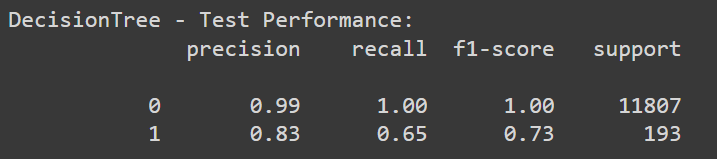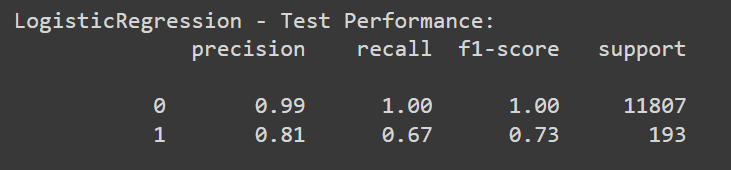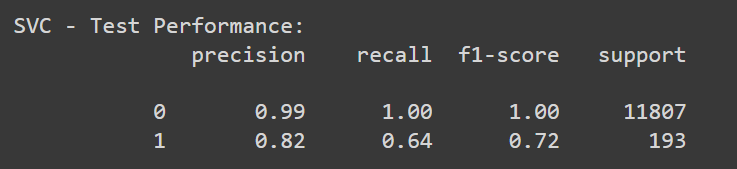

# Test performance from task 2(balanced dataset) for all the models

a) Consider undersampling the majority class and/or oversampling the minority class.

Undersampling

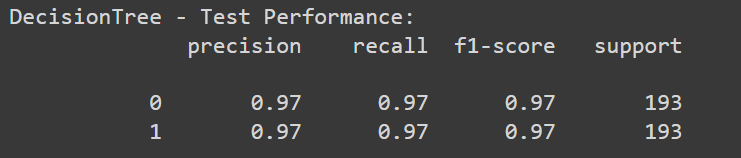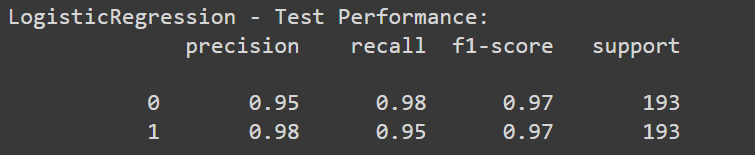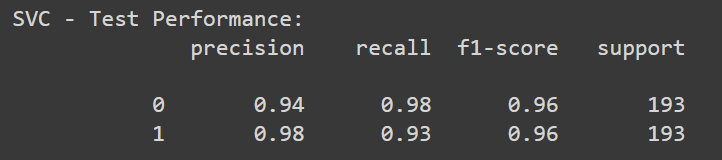

Oversampling

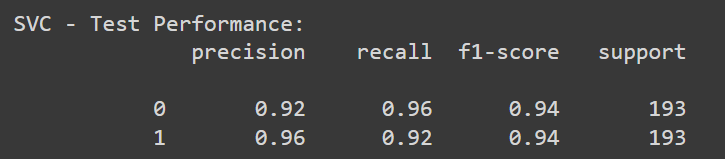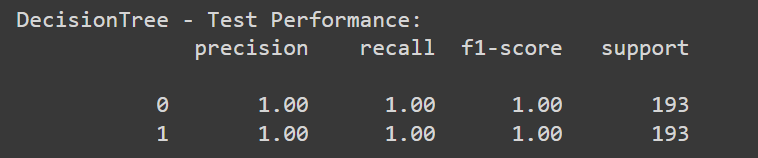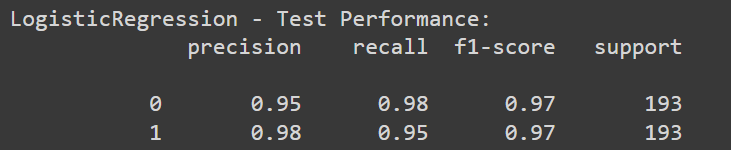

b) Consider using class_weight which is inversely proportional to the class population.
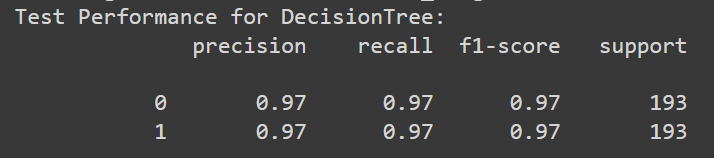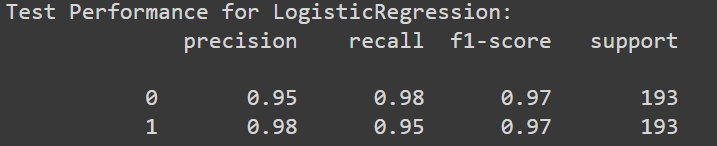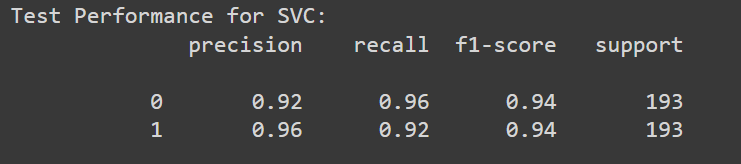

c) Consider using sample_weights, where you may assign a penalty for misclassifying every data
point depending on the class it falls in.

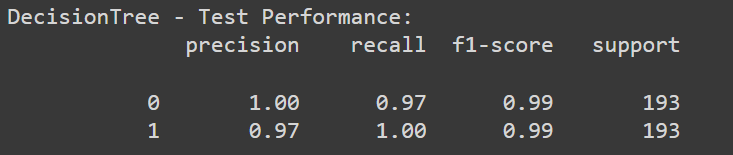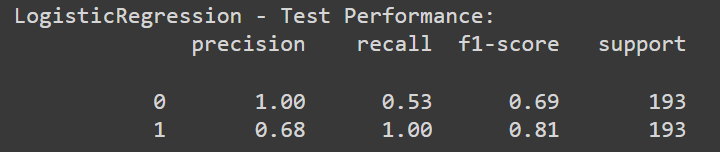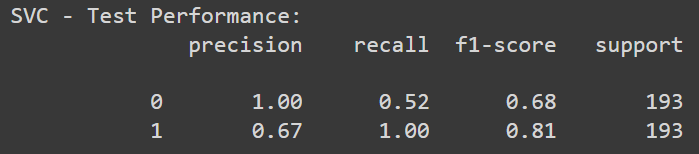

d) Consider any other creative ideas to address the class imbalance.

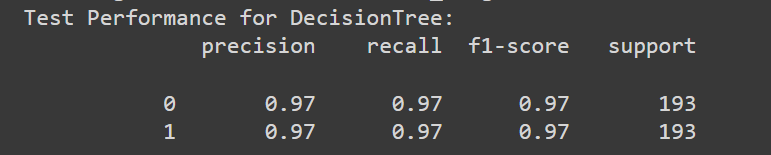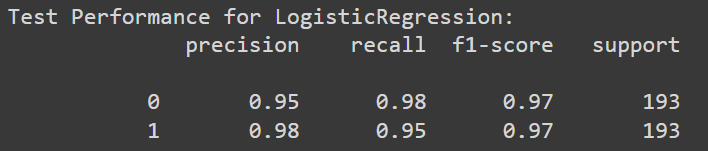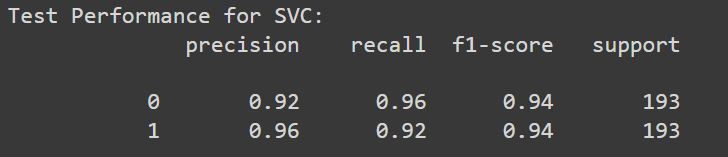

In [ ]:
"The End"